In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import pandas as pd

In [2]:
G = nx.Graph()
G.add_edge('A', 'F', weight=1)
G.add_edge('B', 'F', weight=2)
G.add_edge('B', 'C', weight=2)
G.add_edge('C', 'F', weight=2)
G.add_edge('D', 'F', weight=3)
G.add_edge('D', 'E', weight=2)
G.add_edge('E', 'F', weight=1)
G.add_node('G')

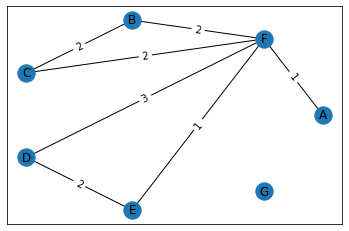

In [3]:
pos = pos=nx.circular_layout(G)
weights = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx(G, pos)
nx.draw_networkx_edge_labels(G, pos, weights)
plt.show()

In [4]:
def local_degree(g, o):
    """Local degree d(O_i)"""
    return g.degree(o)

assert(local_degree(G, 'A') == 1)
assert(local_degree(G, 'B') == 2)
assert(local_degree(G, 'F') == 5)
assert(local_degree(G, 'G') == 0)

In [5]:
def local_significance(g, o):
    """Local significance g(O_i)"""
    return sum(g.get_edge_data(*e)['weight'] for e in g.edges(o))

assert(local_significance(G, 'A') == 1)
assert(local_significance(G, 'B') == 4)
assert(local_significance(G, 'G') == 0)

In [6]:
def representativeness(g, o, x):
    """x-representativeness r_x(O_i)"""
    assert(x > 0)
    if local_degree(g, o) == 0:
        return 0
    
    return local_significance(g, o) / math.log(1 + local_degree(g, o), x)

In [7]:
def representativeness_base(g, o):
    """x-representativeness base b(O_i)"""
    return (1 + local_degree(g, o)) ** (1 / local_significance(g, o))

In [8]:
def local_representativeness(g, o):
    """local representativeness lr(O_i)"""
    return 1 / representativeness_base(g, o) if local_significance(g, o) > 0 else 0

In [9]:
def representative_neighbor(g, o):
    """representative neighbor K(O_i)"""
    k = round(local_representativeness(g, o) * local_degree(g, o))
    return k

In [10]:
data = []
#columns = ['Object', 'Local degree', 'Local significance', 'x-representativeness', 'x-representativeness base', 'local representativeness', 'representative neighbor']
columns = ['Object', 'Local degree', 'Local significance', 'x-representativeness', 'local representativeness', 'representative neighbor']

x = 10
for o in G:
    data.append([
        o,
        local_degree(G, o),
        local_significance(G, o),
        representativeness(G, o, x),
        #representativeness_base(G, o),
        local_representativeness(G, o),
        representative_neighbor(G, o)
    ])
    
df = pd.DataFrame(data=data, columns=columns)
df

,Object,Local degree,Local significance,x-representativeness,local representativeness,representative neighbor
0,A,1,1,3.321928,0.500000,0
1,F,5,9,11.565875,0.819481,4
2,B,2,4,8.383613,0.759836,2
3,C,2,4,8.383613,0.759836,2
4,D,2,5,10.479516,0.802742,2
5,E,2,3,6.287710,0.693361,1
6,G,0,0,0.000000,0.000000,0
